# Disjunctive Programming

TODO: Rewrite following new style guide

TODO: MS ... contrast bigm vs gdp

## Logical Relationships

MIT OpenCourseWare example: https://ocw.mit.edu/courses/sloan-school-of-management/15-053-optimization-methods-in-management-science-spring-2013/tutorials/MIT15_053S13_tut09.pdf

K


Example: Assign advertisers to television ad slots



In [4]:
import pyomo.environ as pyo
import pyomo.gdp as gdp

m = pyo.ConcreteModel()

pyo.TransformationFactory("gdp.bigm").apply_to(m)
pyo.SolverFactory("gurobi_direct").solve(m)

{'Problem': [{'Name': 'unknown', 'Lower bound': 0.0, 'Upper bound': 0.0, 'Number of objectives': 1, 'Number of constraints': 0, 'Number of variables': 0, 'Number of binary variables': 0, 'Number of integer variables': 0, 'Number of continuous variables': 0, 'Number of nonzeros': 0, 'Sense': 1, 'Number of solutions': 1}], 'Solver': [{'Name': 'Gurobi 9.51', 'Status': 'ok', 'Wallclock time': 0.00021505355834960938, 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.'}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

Disjunctive programming describes a class of optimization problems that include disjunctive ("or") constraints. These are encountered when there is a choice to be made, such as whether to do perform job A before job B on a machine, or use raw supplier X rather than Y in a supply chain, or open a retail store at location A, B, C, or D in a metropolitan area. 

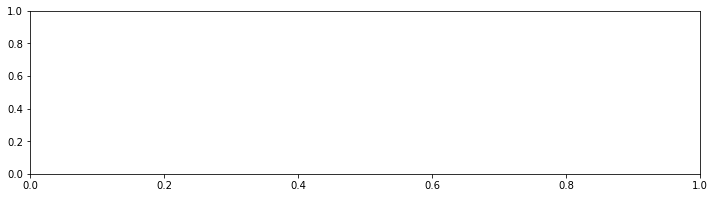

In [261]:
import random
import matplotlib.pyplot as plt

n_boxes = 10

boxes = dict()
for n in range(n_boxes):
    w = random.randint(10, 30)
    h = random.randint(10, 30)
    boxes[n] = {"W": w, "H": h, "D": }
    
print(boxes)

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
x = 0
for box in boxes.keys():
    ax.rectangle(

In [260]:
import pyomo.environ as pyo
import pyomo.gdp as gdp

m = pyo.ConcreteModel()

m.BOXES = pyo.Set(initialize=boxes.keys())
m.width_on_shelf = pyo.Var(m.BOXES, domain=pyo.NonNegativeReals, bounds=(0, 50))
m.orientation = pyo.Var(m.BOXES, domain=pyo.NonNegativeIntegers, bounds=(1, 3))

@m.Objective(sense=pyo.minimize)
def shelf_width(m):
    return sum(m.width_on_shelf[box] for box in m.BOXES)

@m.Disjunction(m.BOXES, xor=True)
def orient_box(m, box):
    return [[m.orientation[box]==1, 
             m.width_on_shelf[box]==boxes[box]["W"]],
            
            [m.orientation[box]==2,
             m.width_on_shelf[box]==boxes[box]["H"]],
            
             [m.orientation[box]==3,
             m.width_on_shelf[box]==boxes[box]["D"]],
           ]

pyo.TransformationFactory("gdp.bigm").apply_to(m)
pyo.SolverFactory("cbc").solve(m)

for box in m.BOXES:
    print(f"Box {box:3d}  Orientation {m.orientation[box]()}  Width on Shelf {m.width_on_shelf[box]():4.1f}")

Box   0  Orientation 1.0  Width on Shelf 11.0
Box   1  Orientation 3.0  Width on Shelf 18.0
Box   2  Orientation 2.0  Width on Shelf 16.0
Box   3  Orientation 3.0  Width on Shelf 12.0
Box   4  Orientation 1.0  Width on Shelf 24.0
Box   5  Orientation 1.0  Width on Shelf 15.0
Box   6  Orientation 3.0  Width on Shelf 13.0
Box   7  Orientation 2.0  Width on Shelf 16.0
Box   8  Orientation 2.0  Width on Shelf 12.0
Box   9  Orientation 1.0  Width on Shelf 10.0


Suppose we have a set of items to deliver to customer that need to bo packaged into boxes for express shipping. Express shipping requires each package to weigh less than 30 kg. 



In [241]:
import pyomo.environ as pyo
import pyomo.gdp as gdp

# data dictionary
weights = {"A": 12, "B": 8, "C": 20, "D": 10, "E": 25}

m = pyo.ConcreteModel()

m.BOXES = pyo.RangeSet(3)
m.ITEMS = pyo.Set(initialize=weights.keys())

m.assign = pyo.Var(m.ITEMS, m.BOXES, domain=pyo.Binary)
m.use_box = pyo.Var(m.BOXES, domain=pyo.Binary)

@m.Disjunction(m.ITEMS, xor=True)
def assign_item_to_one_box(model, item):
    return [[m.assign[item, box] == 1, m.use_box[box] == 1] for box in m.BOXES]

@m.Disjunction(m.BOXES, xor=True)
def assign_all_items(model, box):
    return [m.assign[item, box] == 1 for item in m.ITEMS]

@m.Constraint(m.BOXES)
def weight_limit(model, box):
    return sum(m.assign[item, box]*weights[item] for item in m.ITEMS) <= 30

pyo.TransformationFactory("gdp.hull").apply_to(m)

pyo.SolverFactory('gurobi_direct').solve(m)

for box in m.BOXES:
    print(f"\nPacking list for Box {box}")
    for item in m.ITEMS:
        if m.assign[item, box]():
            print(f"    Item {item}: {weights[item]:5.2f} kg")
    print(f"     TOTAL: {m.weight_limit[box]():5.2f} kg")


Packing list for Box 1
    Item A: 12.00 kg
    Item B:  8.00 kg
    Item D: 10.00 kg
     TOTAL: 30.00 kg

Packing list for Box 2
    Item B:  8.00 kg
    Item C: 20.00 kg
     TOTAL: 28.00 kg

Packing list for Box 3
    Item E: 25.00 kg
     TOTAL: 25.00 kg


## Logical

In [ ]:
import pyomo.environ as pyo
import pyomo.gdp as gdp

m = pyo.ConcreteModel()

m.x = pyo.Var(bounds=(0, 1000))
m.y = pyo.Var(bounds=(0, 1000))



## Installations and imports

In [ ]:
import pyomo.environ as pyo
import pyomo.gdp as gdp
import pandas as pd

## Problem statement



### Component data

In [8]:
# load data as dictionary of components
# component data consists of cost and composition 
comp_data = {
    "A": {"cost": 2.0, "Vit A": 0.5, "Vit B": 0.2},
    "B": {"cost": 2.0, "Vit A": 0.4, "Vit B": 0.1},
    "C": {"cost": 5.0, "Vit A": 0.3, "Vit B": 0.3},
}

# use pandas to create a nice display
pd.DataFrame.from_dict(comp_data, orient='index')

,cost,Vit A,Vit B
A,2.0,0.5,0.2
B,2.0,0.4,0.1
C,5.0,0.3,0.3


### Product Composition Requirements

Find the lowest cost blend

* Vit A: less than 0.4
* Vit B: greater than 0.2

Your code should be able to accept alternative specification for data and product requirements.


In [9]:
prod_req = {
    "Vit A": {"lb": 0.0, "ub": 0.4},
    "Vit B": {"lb": 0.2, "ub": 1.0},
}
pd.DataFrame.from_dict(prod_req, orient='index')

,lb,ub
Vit A,0.0,0.4
Vit B,0.2,1.0


### Component Compatibility

For this application, we consider an additional type of constraint specifying the incompatability of certain blends of components. For example, suppose we have a constraint:

* A and B cannot be mixed together in the final product

The constraint is specified by creating a list of incompatabile pairs.

In [10]:
excl_pairs = [("A", "B")]

## Version 0: Neglecting the compatibility requirments

In [15]:
m = pyo.ConcreteModel()

# define sets that will be used to index decision variables and constraints

m.COMPONENTS = pyo.Set(initialize=comp_data.keys())
m.REQUIREMENTS = pyo.Set(initialize=prod_req.keys())

# decision variables
m.x = pyo.Var(m.COMPONENTS, domain=pyo.NonNegativeReals)

@m.Objective(sense=pyo.minimize)
def cost(m):
    return sum(m.x[c]*comp_data[c]["cost"] for c in m.COMPONENTS)

@m.Constraint(m.COMPONENTS)
def mass_fraction(m, c):
    return sum(m.x[c] for c in m.COMPONENTS)==1)

# com
m.lb = pyo.Constraint(m.req, rule=lambda m, r: sum(m.x[c]*comp_data[c][r] for c in m.comp) >= prod_req[r]["lb"])
m.ub = pyo.Constraint(m.req, rule=lambda m, r: sum(m.x[c]*comp_data[c][r] for c in m.comp) <= prod_req[r]["ub"])

solver = pyo.SolverFactory('cbc')
solver.solve(m)

for c in m.comp:
    print(f"{c} = {m.x[c]()}")

A = 0.33333333
B = 0.33333333
C = 0.33333333


## Version 1: Including compatibility requirements with Big-M

The challenge of this problem are the disjunctive constraints associated with the component incompatability data. Here we associated a boolean variable for each pair, then use the boolean variable to determine which member of the pair to keep in the blend.

In [ ]:
m = ConcreteModel()

# define sets that will be used to index decision variables and constraints
# remember to use initialize keyword
m.comp = Set(initialize=comp_data.keys())
m.req = Set(initialize=prod_req.keys())

# define a set to that includes the excluded pairs
m.pairs = Set(initialize=excl_pairs)

# decision variables
m.x = Var(m.comp, domain=NonNegativeReals)

# for each excluded pair, create a boolean variable. The value of the boolean
# variable will determine which member of the pair is allowed in the product
m.y = Var(m.pairs, domain=Boolean)

# objective function
m.cost = Objective(expr=sum(m.x[c]*comp_data[c]["cost"] for c in m.comp), sense=minimize)

# structural constraints
m.massfraction = Constraint(expr=sum(m.x[c] for c in m.comp)==1)

# composition constraints
m.lb = Constraint(m.req, rule=lambda m, r: sum(m.x[c]*comp_data[c][r] for c in m.comp) >= prod_req[r]["lb"])
m.ub = Constraint(m.req, rule=lambda m, r: sum(m.x[c]*comp_data[c][r] for c in m.comp) <= prod_req[r]["ub"])

# component incompatability constraints
M = 100
m.disj = ConstraintList()
for pair in m.pairs:
    a, b = pair
    m.disj.add(m.x[a] <= M*m.y[pair])
    m.disj.add(m.x[b] <= M*(1-m.y[pair]))

solver = SolverFactory('cbc')
solver.solve(m)

for c in m.comp:
    print(f"{c} = {m.x[c]()}")


A = 0.0
B = 0.5
C = 0.5


## Version 2. Disjunctive Constraints

In [ ]:
m = ConcreteModel()

# define sets that will be used to index decision variables and constraints
# remember to use initialize keyword
m.comp = Set(initialize=comp_data.keys())
m.req = Set(initialize=prod_req.keys())

# define a set to that includes the excluded pairs
m.pairs = Set(initialize=excl_pairs)

# decision variables
m.x = Var(m.comp, domain=NonNegativeReals, bounds=(0, 1))

# objective function
m.cost = Objective(expr=sum(m.x[c]*comp_data[c]["cost"] for c in m.comp), sense=minimize)

# structural constraints
m.massfraction = Constraint(expr=sum(m.x[c] for c in m.comp)==1)

# composition constraints
m.lb = Constraint(m.req, rule=lambda m, r: sum(m.x[c]*comp_data[c][r] for c in m.comp) >= prod_req[r]["lb"])
m.ub = Constraint(m.req, rule=lambda m, r: sum(m.x[c]*comp_data[c][r] for c in m.comp) <= prod_req[r]["ub"])

# component incompatability constraints
m.disj = Disjunction(m.pairs, rule=lambda m, a, b: [m.x[a] == 0, m.x[b] == 0])

# apply transformations
TransformationFactory('gdp.hull').apply_to(m)

# solve
solver = SolverFactory('cbc')
solver.solve(m)

for c in m.comp:
    print(f"{c} = {m.x[c]()}")


A = 0.0
B = 0.5
C = 0.5


## Analysis 

In [ ]:
comp_data = {
    "A": {"cost": 2.0, "Vit A": 0.5, "Vit B": 0.2},
    "B": {"cost": 2.0, "Vit A": 0.4, "Vit B": 0.1},
    "C": {"cost": 4.0, "Vit A": 0.3, "Vit B": 0.3},
}

prod_req = {
    "Vit A": {"lb": 0.0, "ub": 0.4},
    "Vit B": {"lb": 0.2, "ub": 1.0},
}

excl_pairs = [("A", "B")]

\begin{align*}
x_A + x_B + x_C & = 1 \\
0.5 x_A + 0.4 x_B + 0.3 x_C & \leq 0.4 \\
0.2 x_A + 0.1 x_B + 0.3 x_C & \geq 0.2 \\
\end{align*}

Solving for x_C

\begin{align*}
x_C & = 1 - x_A - x_B
\end{align*}

Substitution

\begin{align*}
0.2 x_A + 0.1 x_B & \leq 0.1 \\
-0.1 x_A - 0.2 x_B & \geq -0.1 \\
\end{align*}


In [1]:
TransformationFactory

NameError: name 'TransformationFactory' is not defined